<center><font size = "10"> Week 6 - Single Cell Electrophysiology<center>
<center><font size = "8">Tutorial 02: Analysis<center>

<font size = "3"><font color = "blue"> In this tutorial you will analyse real single cell voltage recordings

In [1]:
# Load usefull packages
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

# 1. Open files with traces

### Traces description

<font size='3'>Here we have some traces (exp_FirePatter_ch(6/7)_(52/53).dat). Ch6 contains the voltage response and Ch7 the current stimulation. The numbers 52 and 53 represent different "sweeps", so different repetitions of the same stimulation over the same cell.

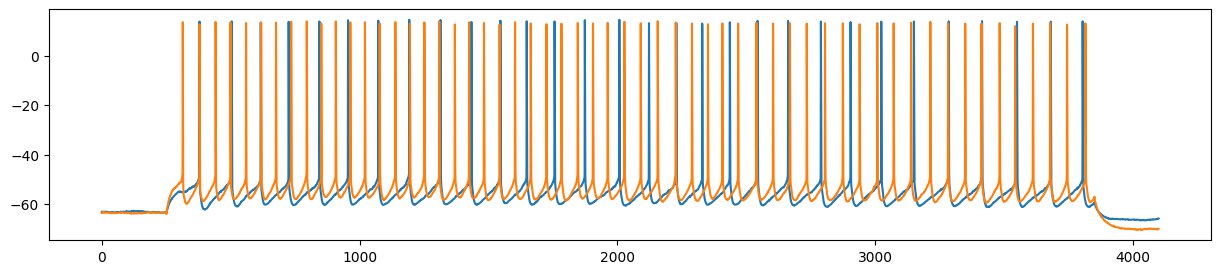

In [2]:
# Open and plot files

def get_data(fn):
    """Read  data file and formatfor plotting"""
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

file_v1 = "exp_FirePattern_ch6_52.dat"
file_v2 = "exp_FirePattern_ch6_53.dat"

FILE_v = [file_v1, file_v2] 

plt.figure(figsize=(15,3))
for fv in FILE_v:
    t, v = get_data(fv)
    plt.plot(t,v)

# 2. Extracting peaks, peak times and amplitude for one sweep

Voltage peaks: [13.918750762939453, 13.956249237060547, 13.524999618530273, 13.83125114440918, 13.9375, 14.443750381469727, 14.26875114440918, 14.637500762939453, 14.537500381469727, 13.75, 14.287500381469727, 14.043750762939453, 13.956249237060547, 14.5, 14.631250381469727, 13.256250381469727, 13.368749618530273, 13.09375, 13.631248474121094, 14.200000762939453, 14.174999237060547, 13.899999618530273, 13.69999885559082, 13.868749618530273, 13.931251525878906, 13.993749618530273, 14.100000381469727, 13.850000381469727, 13.837499618530273, 13.98124885559082]


Amplitudes of action potentials: [63.44375229 63.59999847 64.22500038 64.43125343 63.80624771 64.24374962
 63.39999962 62.66875076 63.33125114 63.36874771 64.05624962 63.10625076
 63.43125153 63.1875     62.98750114 63.63749886 64.03750038 62.61249924
 63.52499771 63.30000305 63.11249924 63.33125114 63.36874962 62.80000114
 63.40000153 63.38125038 63.26250267 62.86874962 63.35624886 64.09999657] 


Times of peak occurences: [ 3789

Text(0, 0.5, 'voltage (mV)')

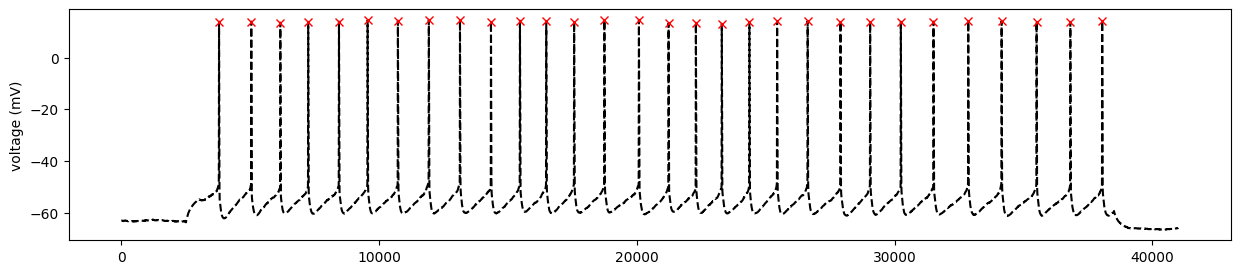

In [3]:
from scipy.signal import find_peaks, peak_prominences

t, v = get_data(file_v1)

# Amplitudes and peak locations
peaks_time, _ = find_peaks(v, prominence=1, height=-20)
amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]

voltage_peaks = []
for x in peaks_time:
    volt_p = v[x]
    voltage_peaks.append(volt_p)
    
#Print results   
print("Voltage peaks: %s" %voltage_peaks)
print('\n')
print ("Amplitudes of action potentials: %s " % amplitudes)
print('\n')
print("Times of peak occurences: %s" % peaks_time)

# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

# 3. Using a specific library: eFEL

<font size = "3">Find the project [here](https://github.com/BlueBrain/eFEL) and the documentation [here](https://efel.readthedocs.io/en/latest/) (also in [pdf](https://readthedocs.org/projects/efel/downloads/pdf/latest/))

<font size='3'>We will use the getFeatureValues() function, which accepts as input a dictionary that represents the trace, and the request eFeature names. The trace dictionary consists of the time and voltage trace, and two floats stim_start and stim_end that specify when the stimulus starts and stops.

In [4]:
file_c1 = "exp_FirePattern_ch7_52.dat"

t, v = get_data(file_v1)
t, i = get_data(file_c1)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

3785
36810


In [7]:
import efel
from json2html import *
import IPython

stim_start = 378.9 # in ms
stim_end = 3681.0
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

In [8]:
feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_9242/602935246.py:1: DeprecationWarning: Use get_feature_values instead
  feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage'])[0]


AP_amplitude,61.8437499982826763.2750015242644662.9062480897696661.6125011394194462.0999984705608562.64999961446833561.4937496175040261.4437522901151762.4187526730818361.6874999978015562.54374885696281461.8937492368806562.2124977124703361.83750152674371562.80624962573849562.35000039330461.6750011565758961.9749984544360961.6562461738170162.30625151325540463.1625022726231662.84374807119928663.08124730940030461.7500018943554361.52500154354877561.843748099130162.55624960915519562.83750340796261
peak_time,378.90000000001766503.9000000000461616.6000000000716724.8000000000962844.1000000001234955.20000000014861072.70000000011991192.70000000001071313.59999999990081433.79999999979151546.19999999968921648.29999999959641756.3999999994981873.79999999939132007.69999999926952122.6999999991652228.69999999906852329.1999999989772436.29999999887972543.8999999987822662.2999999986742789.59999999855842904.69999999845373023.79999999834543150.499999998233285.39999999810743414.699999997993550.39999999786643681.29999999774743804.999999997635
peak_voltage,13.91875076256389613.95624923703464813.52499961730373513.8312511434594113.93749999981497314.44375037956593414.26875114357788414.63750076288869214.53750038130205413.74999999435127214.28750037964365514.0437507579674713.95624923329523914.49999999151335614.63125037772564413.25625038126088713.36874961561848713.09374997275778813.63124845472251514.2000007416197614.17499921194861313.89999958770745713.69999882504557813.86874958098639813.9312515216754313.99374960717435114.10000035809837713.85000034466383113.83749956516664713.981248820409366
